# Week 6
This week will work through the following:

* Data Loading - There will be no problems on this just read the cells to see how to load data from sources.
* EDA (Exploritory Data Analysis) - There are five problems in this section to complete and share in class.
* Matrix Operations - There are four problems in this section to complete and share in class.

# Loading & Saving Data

### Reading
- https://wesmckinney.com/book/accessing-data.html

### Learning Outcomes

- Loading data from files
- Loading data from a database
- loading data from the internet
- Saving data to files


# Loading Data into Pandas

Pandas can import structured data from a variety of file formats and data sources.

File can be in plain-text or in certain binary formats Pandas recognizes.

Files can be on the same computer as your program or on a remote system.



## Pandas Data-loading Methods

Some common methods and file formats are:

- **read_csv** - read delimited values from .csv or .tsv files
- **read_html** - read tables from a .html file
- **read_excel** - read .xls, .xlsx Excel spreadsheets
- **read_json** - read JavaScript Object Notation (JSON) from .json files
- **read_sas** - read a dataset created by SAS
- **read_spss** - read a data file created by SPSS
- **read_xml** - .xml - Extensible Markup Language
- **read_sql** - read results of an SQL query
- **read_sql_table** - read a whole SQL table (similar to everything in a table using `read_sql`)

These methods only work when the data is in a tabular form. If the data isn’t tabular (e.g. with complex or nested data), the read method will throw an error.

### Data Loading Options

All the above methods convert input data into a DataFrame. But they vary according to optional arguments for how to interpret the data.

Some coomon considerations are:

- **Indexing** - which columns to read and whether to get colkumn names from the file
- **Type inference** - converting data to optimal types
- **Date & time parsing** - identifying date/time values and combining multiple columns into one
- **Chunked iteration** - reading large files in chunks
- **Handling dirty data** - Includes skipping rows or comments, formatting numeric data, etc.

See a full list of [options for reading CSV files](https://wesmckinney.com/book/accessing-data#tbl-table_read_csv_function).

## Loading Data From Files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Local Files

Pandas can read files located on the same computer using relative or absolute file paths

In [2]:
# file in same directory
df = pd.read_csv("data.csv")

# file path relative to current directory. 
# Meaning if you had a folder called `examples` in this repo you could access it with the command below. 
#df = pd.read_csv("examples/data.csv")

# absolute file path
#df = pd.read_csv("/usr/johndoe/examples/data.csv")

### Internet Files

In [ ]:
# get example data from pulic internet location
url = "https://data.cdc.gov/api/views/v6ab-adf5/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df.head()

Sometimes it's helpful to retrieve a file from the internet and save to disk before reading into a DataFrame.

Python's `urllib.request` module is helpful for that:

In [ ]:
from urllib import request
data_url = "https://data.cdc.gov/api/views/v6ab-adf5/rows.csv?accessType=DOWNLOAD"
request.urlretrieve(data_url, filename='mortality_data.csv')

### Google Drive

## Loading Data from Databases

### Using SQL

Python has libraries for interacting with common relational database platforms:

- sqlite3 - SQLite
- pymysql - MySQL
- psycopg2 - PostgreSQL
- cx_oracle - Oracle
- pymssql - MS SQL Server

You can `query` a database from Python by:

- creating a connection object with the `connect()` method
- getting a cursor object with the `cursor()` method
- executing an SQL query to fetch desired rows with `execute()` and `fetchall()`

For example, to list the tables in a database:
```
import sqlite3
fires_con = sqlite3.connect('Data/FPA_FOD_20170508.sqlite')
fires_cur = fires_con.cursor()
'SELECT name FROM sqlite_master WHERE type="table"').fetchall()
```

SQL query results can be read directly into a DataFrame using the `read_sql_query` method:

```
fires = pd.read_sql_query(
'''SELECT STATE, FIRE_YEAR, DATETIME(DISCOVERY_DATE) AS DISCOVERY_DATE, FIRE_NAME, FIRE_SIZE, LATITUDE, LONGITUDE FROM Fires''', fires_con)

```

## Working with JSON Data

The JSON format is popular for transmitting data between applications and closely matches the structure of a Python `dict`, with the exception of its `null` value and some other minor syntax differences.

There are several Python libraries for handling JSON, including `json` which is built into Python.



In [ ]:
#
json_string = """
{
  "state": "AK",
  "cities": [
  {"name": "Anchorage", "pop": 250000, "region": "south-central"},
  {"name": "Fairbanks", "pop": 75000, "region": "interior"},
  {"name": "Juneau", "pop": 25000, "region": "south-east"}
  ],
  "industries": ["fishing","mining","tourism"]
}
"""
from pprint import pprint as pp
import json
data = json.loads(json_string)

# use pretty-print to print formatted json data
pp(data)

cities = pd.DataFrame(data["cities"], columns=["name", "pop"])
cities

# Exploratory Data Analysis

### Reading

- https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/
- https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
- https://greenteapress.com/thinkstats2/html/thinkstats2002.html


### Learning Outcomes

- exploratory data analysis
- common data plots - line, bar, scatter, histogram


### Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA), is a crucial initial step for understanding a dataset and preparing for statistical analysis.

EDA answers questions such as:
- what is the data quality?
- what patterns are evident in the data?
- is the data ready to support analysis & conclusions?

EDA is the process of performing initial investigations to:
- Uncover underlying structure & patterns in the data
- Identify important variables
- Identify anomalies
- Set the stage for statisical analysis & visualization


### Problem 1: Understanding the data
This problem will be a collection of easier tasks. Fill in the 5 empty cells below to complete this problem. 

As a first step, it's important to know your data's composition:

- how many observations?
- how many features (variables)?
- what does your data look like?
- which are the dependent variables?
- are any data missing or incorrect?
- what are the primary statistics for each feature?
- what are the data types?
- are variables numeric or categorical?

In [2]:
# retrieve sample data
download_url = ("https://raw.githubusercontent.com/fivethirtyeight/data/master/bechdel/movies.csv")
movie_df = pd.read_csv(download_url)

**Problem 1a**

- how many observations?
- how many features (variables)?


In the cell below print the number of rows and columns in `movie_df`. 

In [3]:
print("Shape of movie_df:", movie_df.shape)  # (rows, columns)

Shape of movie_df: (1794, 15)


**Problem 1b**

- what does your data look like?
- which are the dependent variables?

In the cell below output the first 10 rows of your data.

In [4]:
print(movie_df.head(10))

   year       imdb                   title             test clean_test binary  \
0  2013  tt1711425           21 &amp; Over           notalk     notalk   FAIL   
1  2012  tt1343727                Dredd 3D      ok-disagree         ok   PASS   
2  2013  tt2024544        12 Years a Slave  notalk-disagree     notalk   FAIL   
3  2013  tt1272878                  2 Guns           notalk     notalk   FAIL   
4  2013  tt0453562                      42              men        men   FAIL   
5  2013  tt1335975                47 Ronin              men        men   FAIL   
6  2013  tt1606378  A Good Day to Die Hard           notalk     notalk   FAIL   
7  2013  tt2194499              About Time      ok-disagree         ok   PASS   
8  2013  tt1814621               Admission               ok         ok   PASS   
9  2013  tt1815862             After Earth           notalk     notalk   FAIL   

      budget    domgross     intgross      code  budget_2013$  domgross_2013$  \
0   13000000  25682380.0   

**Problem 1c**

- are any data missing or incorrect?
- what are the primary statistics for each feature?

Get a basic statisical description of the data. In the first cell describe the numeric data and in the second describe the objects. 

In [5]:
print(movie_df.describe())

              year        budget      domgross      intgross  budget_2013$  \
count  1794.000000  1.794000e+03  1.777000e+03  1.783000e+03  1.794000e+03   
mean   2002.552397  4.482646e+07  6.913205e+07  1.503857e+08  5.546461e+07   
std       8.979731  4.818603e+07  8.036731e+07  2.103353e+08  5.491864e+07   
min    1970.000000  7.000000e+03  0.000000e+00  8.280000e+02  8.632000e+03   
25%    1998.000000  1.200000e+07  1.631157e+07  2.612947e+07  1.606892e+07   
50%    2005.000000  2.800000e+07  4.219406e+07  7.648246e+07  3.699579e+07   
75%    2009.000000  6.000000e+07  9.335492e+07  1.898509e+08  7.833790e+07   
max    2013.000000  4.250000e+08  7.605076e+08  2.783919e+09  4.614359e+08   

       domgross_2013$  intgross_2013$  period code  decade code  
count    1.776000e+03    1.783000e+03  1615.000000  1615.000000  
mean     9.517478e+07    1.978380e+08     2.419814     1.937461  
std      1.259653e+08    2.835079e+08     1.194620     0.690116  
min      8.990000e+02    8.990000

In [6]:
print(movie_df.describe(include=['O']))  # 'O' stands for object types


             imdb                title  test clean_test binary      code
count        1794                 1794  1794       1794   1794      1794
unique       1794                 1768    10          5      2        85
top     tt0065466  Pride and Prejudice    ok         ok   FAIL  2009FAIL
freq            1                    3   696        803    991        82


**Problem 1d**

- what are the data types?
- are variables numeric or categorical?

Get the information about your data frame. You'll want to output the name of each column, the non-null count and the data type of each column.

In [7]:
print(movie_df.info())  # Displays column names, non-null counts, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            1794 non-null   int64  
 1   imdb            1794 non-null   object 
 2   title           1794 non-null   object 
 3   test            1794 non-null   object 
 4   clean_test      1794 non-null   object 
 5   binary          1794 non-null   object 
 6   budget          1794 non-null   int64  
 7   domgross        1777 non-null   float64
 8   intgross        1783 non-null   float64
 9   code            1794 non-null   object 
 10  budget_2013$    1794 non-null   int64  
 11  domgross_2013$  1776 non-null   float64
 12  intgross_2013$  1783 non-null   float64
 13  period code     1615 non-null   float64
 14  decade code     1615 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 210.4+ KB
None


### Types of data

How you analyze the data will depend on its type.

- **Categorical** - Data that can take on one of a limited, and usually fixed, number of possible values, assigning each row to one of these value often refered to as a category or group. Often type `object` in pandas.
    - **Nominal** - Categorical data with no inherent ordering between the categories (e.g. vehicle types)
    - **Ordinal** - Categorical data with an inherent ordering, but where the “differences” between categories has no numerical meaning (e.g. agree, strongly agree, etc)
- **Numeric/Continuous** - Data that is a number which represents a interval or ratio as described below. Often type `int` or `float` in pandas.
    - **Interval** - Numeric data with ordering, where relative differences in interval data have meaning (e.g. temperatures)
    - **Ratio** - Numeric data where the ratio between measurements has some meaning

One thing to be careful of is if categorical variables are stored as numbers i.e. group_numbers from the set [1, 2, 3, 4]. A good test is to think if you can perform math on the data and have it make sense. i.e. for the groups: 1 - 2 = 1 but this doesn't say anything about the relationship between group 1 and 2. 

- **Dates** - Dates are a tricky third type of data that can be treated as either categorical or numeric depending on the application. 
    - **Categorical** - If you break a date into it's parts you can treat it as categorical data. For example which day of the week has the largest number of ticket sales. Day of the week is a category in this application.
    - **Numeric/Continuous** - You can treat dates as numbers if you think about them as time since a fixed point. Let's say you treated a water sample on 2025-01-01 and each day you measured how clean the water was. Each row would have a date that you tell you how may days have elapsed since 2025-01-01. You could calculate the number of days and use that as a number in a line graph or you could simply use the date and it would convey the same information. 

In this data set we have `year` which describes the year the movie was released. We will use this as numeric for our exploration. 

### Problem 2: Getting list of features
Create two lists: numeric_features and categorical_features which have the column name of each. 

There are a few ways to do this:
1. Use `dtypes`, `columns` and list comprehension
2. Use `select_dtypes` and `columns`

Impliment both ways and then chec that they are the same lists. 

In [8]:
numeric_features_1 = [col for col in movie_df.columns if movie_df[col].dtype in ['int64', 'float64']]
categorical_features_1 = [col for col in movie_df.columns if movie_df[col].dtype == 'object']

numeric_features_2 = list(movie_df.select_dtypes(include=['number']).columns)
categorical_features_2 = list(movie_df.select_dtypes(include=['object']).columns)

print(numeric_features_1 == numeric_features_2)
print(categorical_features_1 == categorical_features_2)

True
True


### Problem 3: Print out values counts of categorical features
It is often easier to loop through the list of your columns and perform some basic exploration of columns of the same types. For this problem you will loop through all categorical_features and if they have 10 or fewer values print out the count of each value.

In [9]:
for categorical_column in categorical_features_1:
    unique_value_count = movie_df[categorical_column].nunique()
    if unique_value_count <= 10:
        print(f"\nValue counts for {categorical_column}:")
        print(movie_df[categorical_column].value_counts())


Value counts for test:
test
ok                  696
notalk              379
notalk-disagree     135
men                 125
ok-disagree         107
nowomen              88
dubious              81
men-disagree         69
dubious-disagree     61
nowomen-disagree     53
Name: count, dtype: int64

Value counts for clean_test:
clean_test
ok         803
notalk     514
men        194
dubious    142
nowomen    141
Name: count, dtype: int64

Value counts for binary:
binary
FAIL    991
PASS    803
Name: count, dtype: int64


### Problem 4: Histograms for Numeric Columns
For all numeric_features:
1. Print the name of the column
2. Create a histogram plot using df.plot.histogram 
3. Make the histogram show using plt.show()

For 5 points extra credit you can set the bin width using Freedman–Diaconis rule and the number of bins such that 
number_bins = (max - min)/bin_width

https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

year


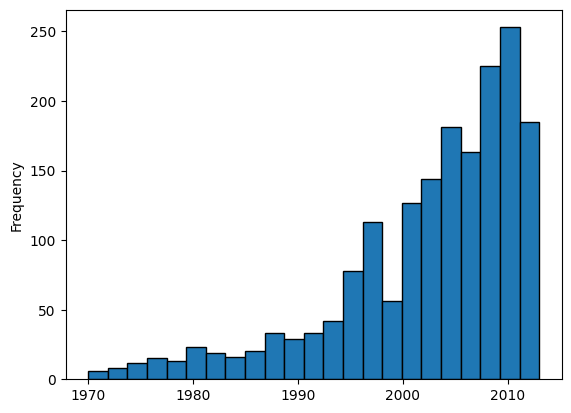

budget


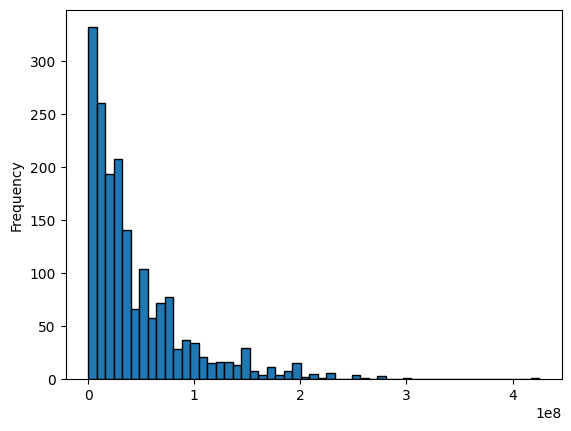

domgross


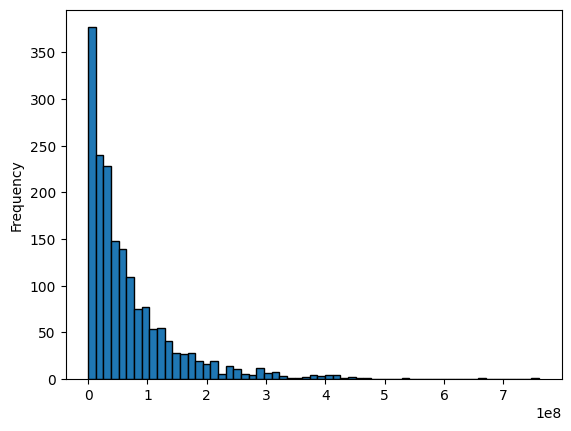

intgross


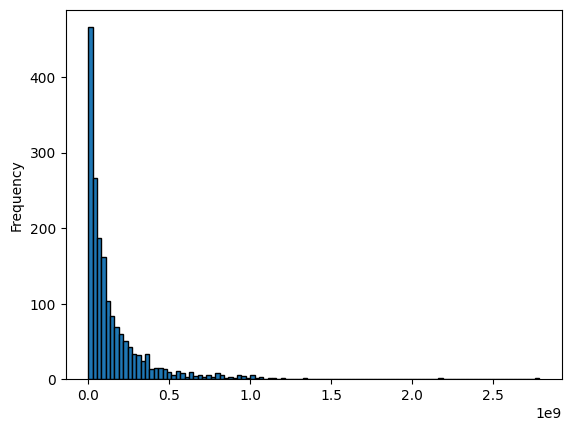

budget_2013$


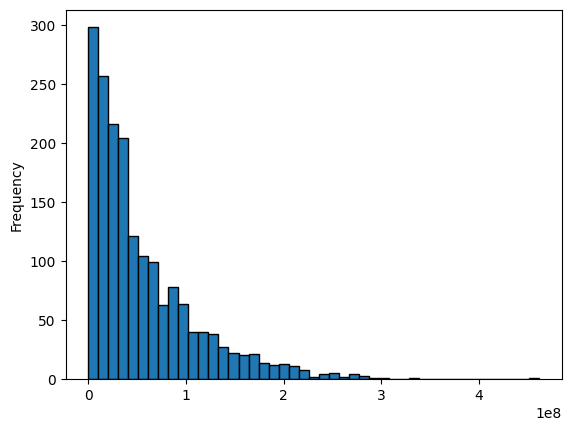

domgross_2013$


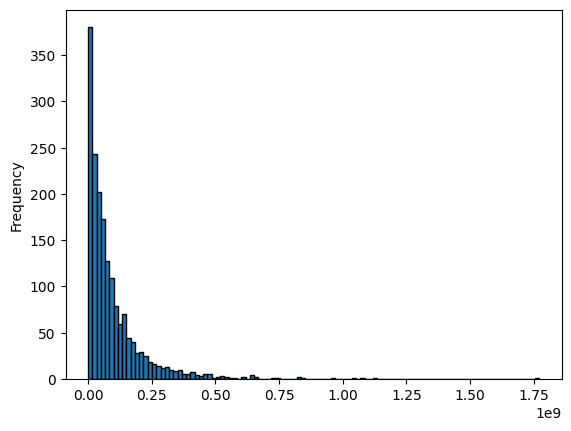

intgross_2013$


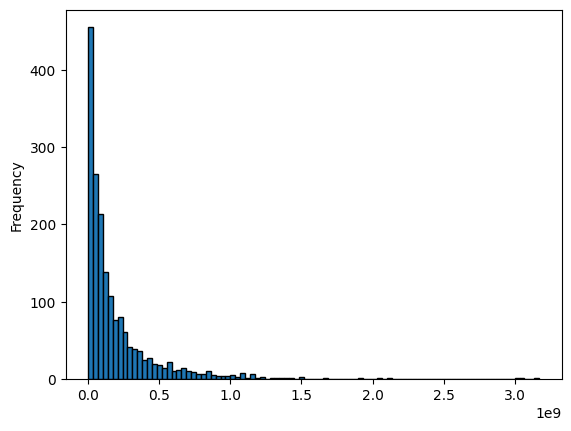

period code


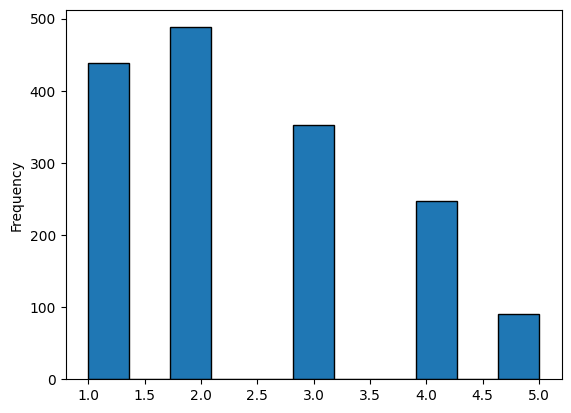

decade code


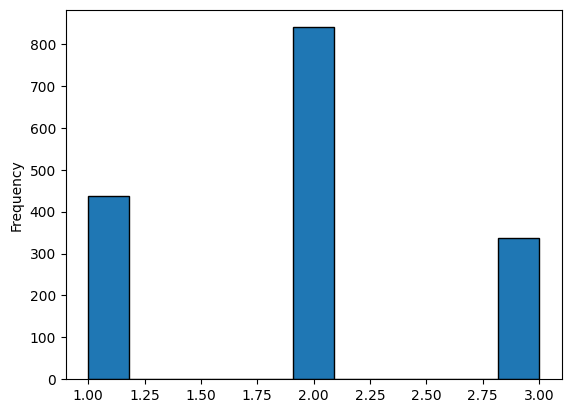

In [10]:
for numeric_column in numeric_features_1:
    print(numeric_column)
    
    data = movie_df[numeric_column].dropna()
    
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * iqr * (len(data) ** (-1/3))
    number_bins = int((data.max() - data.min()) / bin_width) if bin_width > 0 else 10

    movie_df[numeric_column].plot.hist(bins=number_bins, edgecolor='black')
    plt.show()

### Problem 5: Numerical Relationships
The other thing we often want to understand is if there is a relaionship between numerical features. Scatter plot matricies are a quick way to evaluate if there is a relationship between a collection of numerical features.

Looking at the histograms above we have several features that look more categorical than numeric i.e. decade code. Because of this we will only create a scatter plot matrix with only a subset of the features:

`['budget', 'domgross', 'intgross', 'budget_2013$', 'domgross_2013$', 'intgross_2013$']`

There are a few scatter plot matricies avaible in the Python data ecosystem. You will use two of them in this problem:

1. pd.plotting.scatter_matrix
2. seaborn.pairplot

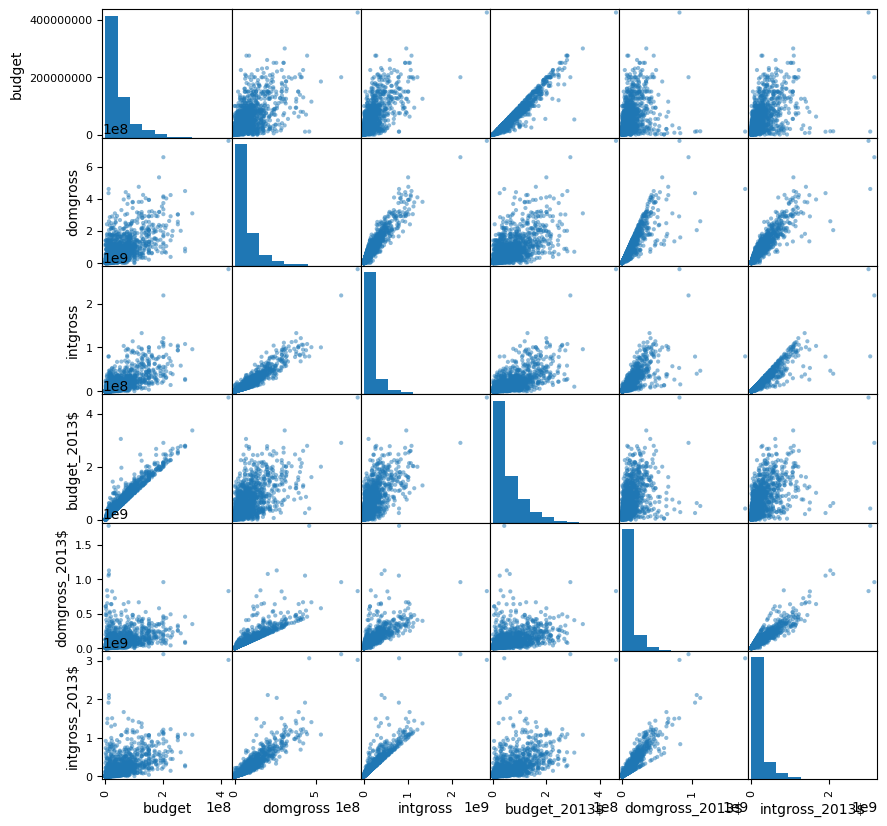

In [12]:
selected_numeric_features = ['budget', 'domgross', 'intgross', 'budget_2013$', 'domgross_2013$', 'intgross_2013$']

pd.plotting.scatter_matrix(movie_df[selected_numeric_features], figsize=(10, 10), diagonal='hist')
plt.show()

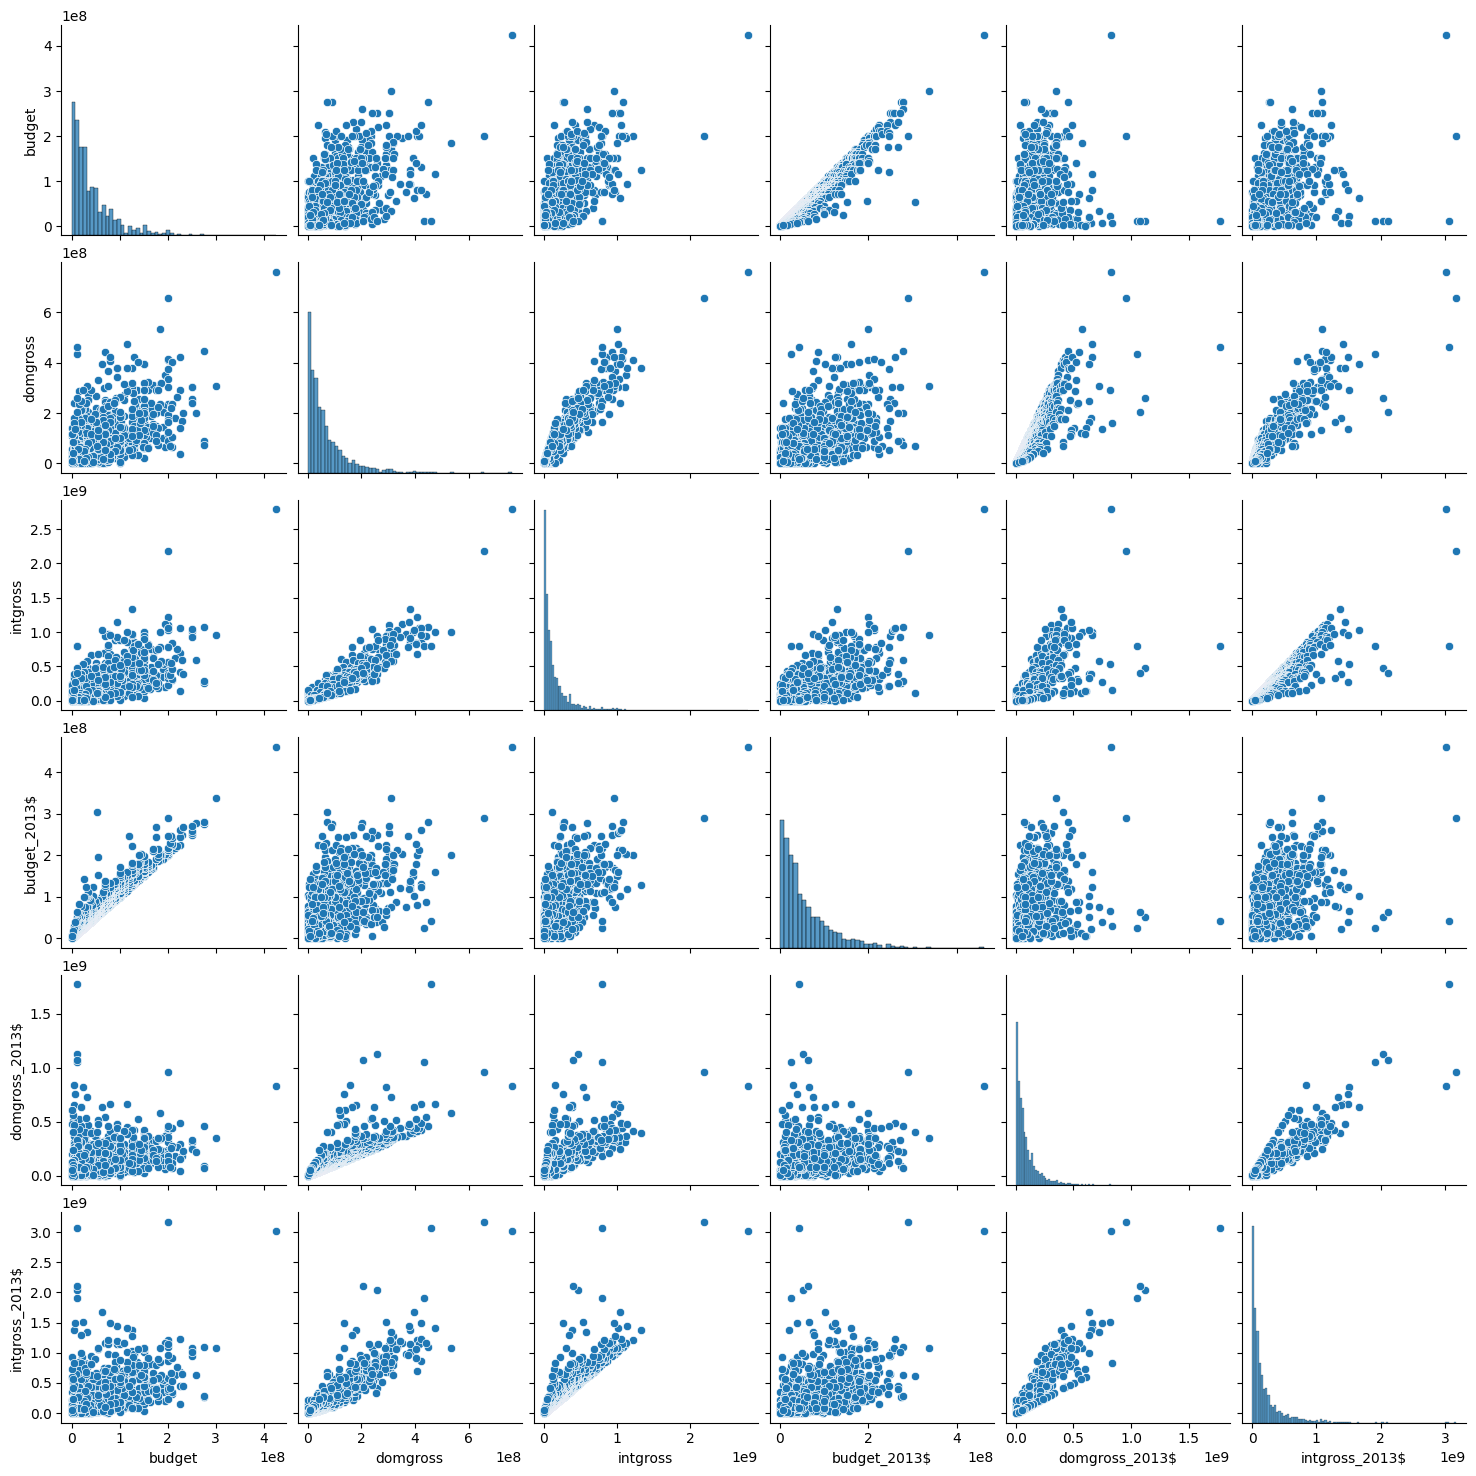

In [13]:
sns.pairplot(movie_df[selected_numeric_features])
plt.show()

## Matrix Opperations

For this section of applying our linear algebra learnings we will work through a few matrix opperation problems. 

### Problem 6: Matrix Addition

Implement matrix addition element-wise using two for loops over rows and columns. What happens when you try to add two matrices with mismatching sizes? This exercise will help you think about breaking down a matrix into rows, columns, and individual elements. This type of addition requires both matrices to have the same number of rows and columns, anything else will result in the following error! The best way to handle it might be to create exception handling that returns a message instead of an error.

In [ ]:
def add_matrices(matrix_a, matrix_b):
    if len(matrix_a) != len(matrix_b) or len(matrix_a[0]) != len(matrix_b[0]):
        raise ValueError("Matrices must have the same dimensions.")

    result_matrix = [[0] * len(matrix_a[0]) for _ in range(len(matrix_a))]
    
    for row in range(len(matrix_a)):
        for col in range(len(matrix_a[0])):
            result_matrix[row][col] = matrix_a[row][col] + matrix_b[row][col]
    
    return result_matrix

matrix_x = [[1, 2, 3], 
            [4, 5, 6]]
matrix_y = [[7, 8, 9], 
            [10, 11, 12]]

print(add_matrices(matrix_x, matrix_y))

matrix_z = [[1, 2], 
            [3, 4], 
            [5, 6]]

print(add_matrices(matrix_x, matrix_z))


[[8, 10, 12], [14, 16, 18]]


ValueError: Matrices must have the same dimensions

### Problem 7: Matrix Multiplication

Code matrix multiplication using for loops. Confirm your results against using the numpy @ operator. This exercise will help you solidify your understanding of matrix multiplication, but in practice, it’s always better to use @ instead of writing out a double for loop.

In [20]:
def multiply_matrices(matrix_a, matrix_b):
    if len(matrix_a[0]) != len(matrix_b):
        raise ValueError("Number of columns in first matrix must match number of rows in second matrix")

    result_matrix = [[0] * len(matrix_b[0]) for _ in range(len(matrix_a))]
    
    for row in range(len(matrix_a)):
        for col in range(len(matrix_b[0])):
            for k in range(len(matrix_b)):
                result_matrix[row][col] += matrix_a[row][k] * matrix_b[k][col]
    
    return result_matrix

matrix_a = [[1, 2, 3], 
            [4, 5, 6]]
matrix_b = [[7, 8], 
            [9, 10], 
            [11, 12]]

result_manual = multiply_matrices(matrix_a, matrix_b)
result_numpy = np.array(matrix_a) @ np.array(matrix_b)

print("Manual multiplication result:")
print(result_manual)
print("\nNumPy @ operator result:")
print(result_numpy.tolist())


Manual multiplication result:
[[58, 64], [139, 154]]

NumPy @ operator result:
[[58, 64], [139, 154]]


### Problem 8: Matrix Opperation Commutivity and Distributivity

Matrix addition and scalar multiplication obey the mathematical laws of commutivity and distributivity. That means that the following equations give the same results (assume that the matrices $A$ and $B$ are the same size and that  is some scalar):

$$\sigma (A + B) = \sigma A + \sigma B = A \sigma + B \sigma$$

Rather than proving this mathematically, you are going to demonstrate it through coding. In Python, create two random-numbers matrices of size 
 and a random scalar. Then implement the three expressions in the previous equation. You’ll need to figure out a way to confirm that the three results are equal. Keep in mind that tiny computer precision errors in the range of 
 should be ignored.

In [ ]:
matrix_A = np.random.rand(3, 3)
matrix_B = np.random.rand(3, 3)
scalar_value = np.random.rand()

result_1 = scalar_value * (matrix_A + matrix_B)
result_2 = scalar_value * matrix_A + scalar_value * matrix_B
result_3 = matrix_A * scalar_value + matrix_B * scalar_value

tolerance_level = 1e-6
are_results_equal = np.allclose(result_1, result_2, atol=tolerance_level) and np.allclose(result_1, result_3, atol=tolerance_level)

print(are_results_equal)

True


### Problem 9: Checking Matrix Symmetry

In this exercise, you will write a Python function that checks whether a matrix is symmetric. It should take a matrix as input, and should output a boolean True if the matrix is symmetric or False if the matrix is nonsymmetric. Keep in mind that small computer rounding/precision errors can make “equal” matrices appear unequal. Therefore, you will need to test for equality with some reasonable tolerance. Test the function on symmetric and nonsymmetric matrices.

In [19]:
def is_symmetric(matrix):
    return np.allclose(matrix, matrix.T, atol=1e-6)

symmetric_matrix = np.array([[1, 2, 3], 
                             [2, 4, 5], 
                             [3, 5, 6]])
nonsymmetric_matrix = np.array([[1, 2, 3], 
                                [4, 5, 6], 
                                [7, 8, 9]])

print(is_symmetric(symmetric_matrix))
print(is_symmetric(nonsymmetric_matrix))


True
False
